### 5.12 프로젝트1 : 손수 설계하는 선형회귀

(1) 데이터 가져오기

In [6]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dir(diabetes)

df_X = diabetes.data
df_y = diabetes.target

(2, 3) 모델에 입력할 데이터 X, y 준비하기

In [7]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

(4) train, test 데이터 분리하기

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(5) 모델 준비하기

In [14]:
W = np.random.rand(X.shape[1])
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

(6) 손실함수 loss 정의하기

In [15]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [122]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기 구하는 gradient 함수 구현하기

In [16]:
def gradient(X, W, b, y):
    #N은 가중치의 개수
    N = len(W)
    
    #y_pred 준비
    y_pred = model(X, W, b)
    
    #공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    #b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 학습률 설정하기

In [33]:
LEARNING_RATE = 0.001

(9) 모델 학습하기

In [18]:
losses = []

In [34]:
for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i,L))

Iteration 100 : Loss 2893.8457
Iteration 200 : Loss 2893.8412
Iteration 300 : Loss 2893.8367
Iteration 400 : Loss 2893.8323
Iteration 500 : Loss 2893.8277
Iteration 600 : Loss 2893.8232
Iteration 700 : Loss 2893.8187
Iteration 800 : Loss 2893.8142
Iteration 900 : Loss 2893.8096
Iteration 1000 : Loss 2893.8051
Iteration 1100 : Loss 2893.8005
Iteration 1200 : Loss 2893.7960
Iteration 1300 : Loss 2893.7914
Iteration 1400 : Loss 2893.7868
Iteration 1500 : Loss 2893.7822
Iteration 1600 : Loss 2893.7776
Iteration 1700 : Loss 2893.7730
Iteration 1800 : Loss 2893.7683
Iteration 1900 : Loss 2893.7637
Iteration 2000 : Loss 2893.7591
Iteration 2100 : Loss 2893.7544
Iteration 2200 : Loss 2893.7497
Iteration 2300 : Loss 2893.7451
Iteration 2400 : Loss 2893.7404
Iteration 2500 : Loss 2893.7357
Iteration 2600 : Loss 2893.7310
Iteration 2700 : Loss 2893.7263
Iteration 2800 : Loss 2893.7215
Iteration 2900 : Loss 2893.7168
Iteration 3000 : Loss 2893.7121


(10) test 데이터에 대한 성능 확인하기

In [26]:
import matplotlib.pyplot as plt

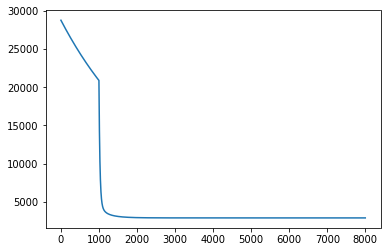

In [35]:
plt.plot(losses)
plt.show()

(11) 정답 데이터와 예측 데이터 시각화하기

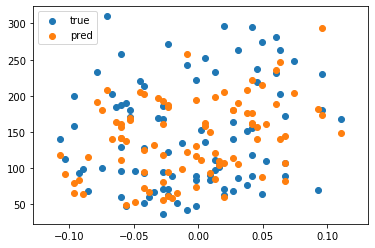

In [41]:
prediction = model(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

어?

### 5.13 프로젝트2 : 날씨 좋은 월요일 오후 세시, 자전거 타는 사람 몇 명?

(1) 데이터 가져오기

In [46]:
import pandas as pd

train = pd.read_csv("~/aiffel/bike-sharing-demand/train.csv")

In [45]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

(2) datetime 자료형으로 변환하고 연월일시분초 6개 열 추가생성

In [50]:
datetime = pd.to_datetime(train.datetime)
datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [54]:
train['year'] = pd.DatetimeIndex(datetime).year
train['month'] = pd.DatetimeIndex(datetime).month
train['day'] = pd.DatetimeIndex(datetime).day
train['hour'] = pd.DatetimeIndex(datetime).hour
train['minute'] = pd.DatetimeIndex(datetime).minute
train['second'] = pd.DatetimeIndex(datetime).second

In [55]:
train.head

<bound method NDFrame.head of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  

(3) 데이터 개수 시각화하기

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

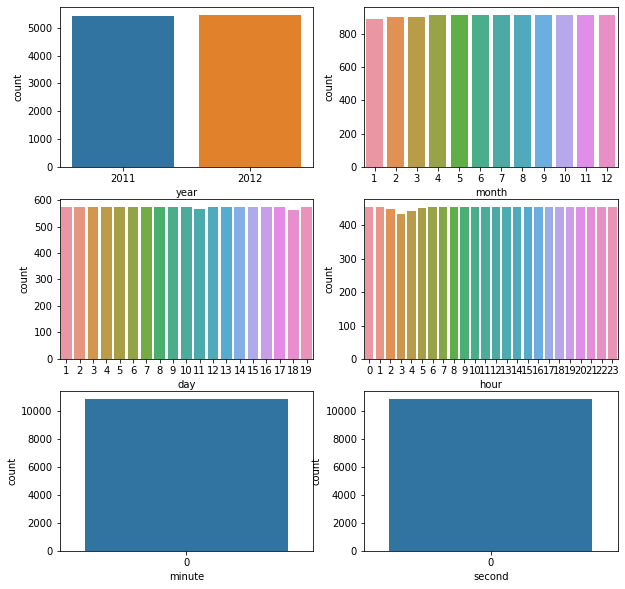

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.countplot(x='year', data=train)
plt.subplot(322)
sns.countplot(x='month', data=train)
plt.subplot(323)
sns.countplot(x='day', data=train)
plt.subplot(324)
sns.countplot(x='hour', data=train)
plt.subplot(325)
sns.countplot(x='minute', data=train)
plt.subplot(326)
sns.countplot(x='second', data=train)
plt.show()

(4) X, y 컬럼 선택 및 train/test 데이터 분리

In [81]:
train.head

<bound method NDFrame.head of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  

In [92]:
X = train[['year', 'month', 'day', 'hour', 'season', 'holiday',
          'humidity', 'windspeed', 'casual', 'temp']].values
y = train['count'].values

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 10) (8708,)
(2178, 10) (2178,)


(5) LinearRegression 모델 학습

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(6) 학습된 데이터로 예측값 출력 및 손실함수 값 계산

In [96]:
predictions = model.predict(X_test)
predictions

array([163.17327046,  32.0656798 , 181.0580473 , ..., 491.77431519,
        51.42211476, 222.92500572])

In [97]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)
rmse = mean_squared_error(y_test, predictions, squared = False)
print(rmse)

13637.946124021848
116.78161723499913


(7) x축 temp, humidity. y축 count로 예측 결과 시각화

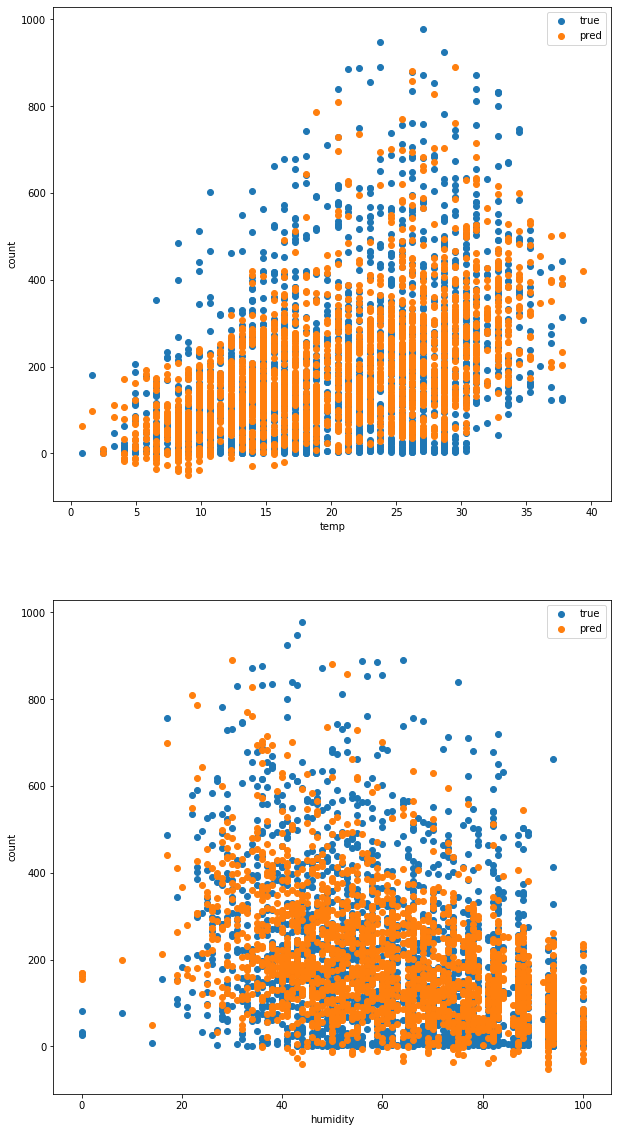

In [121]:
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.xlabel('temp')
plt.ylabel('count')
plt.scatter(X_test[:, 9], y_test, label='true')
plt.scatter(X_test[:, 9], predictions, label='pred')
plt.legend()

plt.subplot(212)
plt.xlabel('humidity')
plt.ylabel('count')
plt.scatter(X_test[:, 6], y_test, label='true')
plt.scatter(X_test[:, 6], predictions, label='pred')
plt.legend()

plt.show()

소감

아프지말자

그래프 그리는 게 제일 어렵다. 다른 건 안어려움

마이크로소프트 선생님들 사랑합니다.